В этом нотбуке я буду анализировать данные по COVID19

In [57]:
import pandas as pd

covid_data = pd.read_csv('data/covid_data.csv')
print(covid_data.head())

         date province/state country  confirmed  deaths  recovered
0  01/22/2020          Anhui   China        1.0     0.0        0.0
1  01/22/2020        Beijing   China       14.0     0.0        0.0
2  01/22/2020      Chongqing   China        6.0     0.0        0.0
3  01/22/2020         Fujian   China        1.0     0.0        0.0
4  01/22/2020          Gansu   China        0.0     0.0        0.0


In [58]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations',
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
covid_data = covid_data.groupby(
    ['date', 'country'],
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active'] = covid_data['confirmed'] - covid_data[
    'deaths'] - covid_data['recovered']
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')[
    'confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')[
    'recovered'].diff()
print(covid_data.head())

            date      country  confirmed  deaths  recovered  active  \
11337 2020-02-24  Afghanistan        1.0     0.0        0.0     1.0   
11570 2020-02-25  Afghanistan        1.0     0.0        0.0     1.0   
11807 2020-02-26  Afghanistan        1.0     0.0        0.0     1.0   
12051 2020-02-27  Afghanistan        1.0     0.0        0.0     1.0   
12299 2020-02-28  Afghanistan        1.0     0.0        0.0     1.0   

       daily_confirmed  daily_deaths  daily_recovered  
11337              NaN           NaN              NaN  
11570              0.0           0.0              0.0  
11807              0.0           0.0              0.0  
12051              0.0           0.0              0.0  
12299              0.0           0.0              0.0  


Death_rate and recover_date

In [59]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

print(vaccinations_data['date'].max())

covid_df = covid_data.merge(vaccinations_data, on=['date', 'country'
                                                   ], how='left')
print(covid_df.shape[0])
print(covid_df.shape[1])

covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed']*100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed']*100
print(round(covid_df[covid_df['country'] == 'United States']['death_rate'].max(
    ), 2))

print(round(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean(
    ), 2))

2021-09-06 00:00:00
86785
16
7.19
67.06


Рисуем график

<AxesSubplot:title={'center':'Ежедневная заболеваемость по всем странам'}, xlabel='date'>

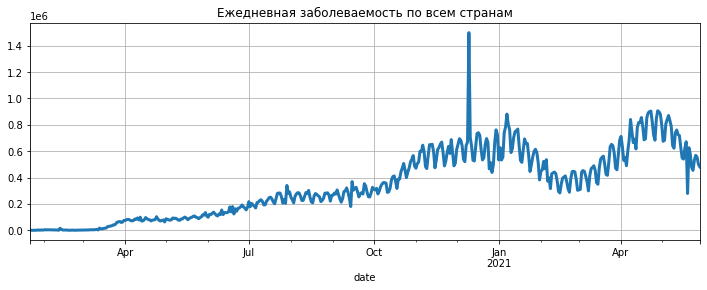

In [60]:

grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость по всем странам',
    grid=True,
    lw=3
)

<AxesSubplot:xlabel='country'>

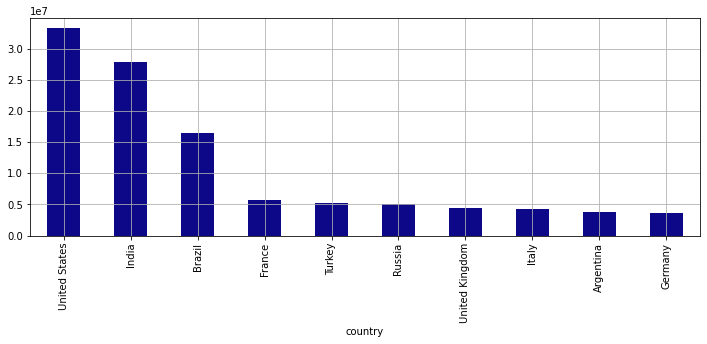

In [61]:

grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
)

<AxesSubplot:xlabel='country'>

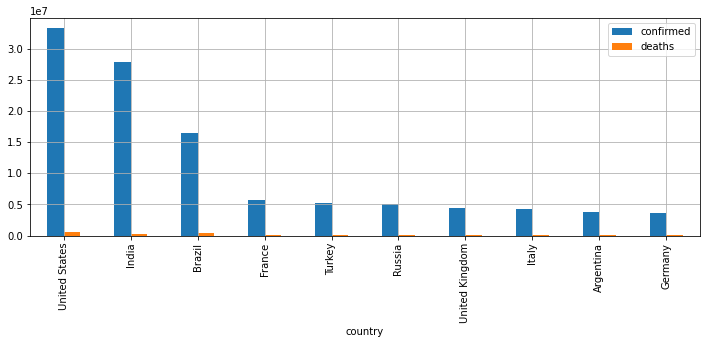

In [62]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
)

<AxesSubplot:xlabel='country'>

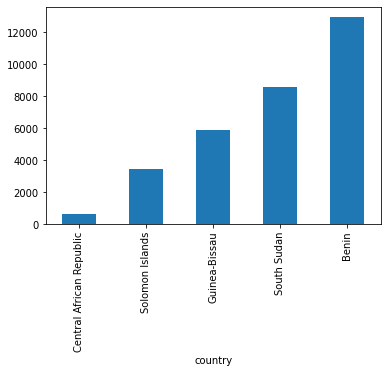

In [63]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar')

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
print(matplotlib.__version__)
print(sns.__version__)

3.5.1
0.11.2


In [65]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

date    country  confirmed  deaths  recovered  active  \
0 2020-01-23  Australia        0.0     0.0        0.0     0.0   
1 2020-01-25  Australia        4.0     0.0        0.0     4.0   
2 2020-01-26  Australia        4.0     0.0        0.0     4.0   
3 2020-01-27  Australia        5.0     0.0        0.0     5.0   
4 2020-01-28  Australia        5.0     0.0        0.0     5.0   

   daily_confirmed  daily_deaths  daily_recovered  total_vaccinations  \
0              NaN           NaN              NaN                 NaN   
1              4.0           0.0              0.0                 NaN   
2              0.0           0.0              0.0                 NaN   
3              1.0           0.0              0.0                 NaN   
4              0.0           0.0              0.0                 NaN   

   people_vaccinated  people_vaccinated_per_hundred  people_fully_vaccinated  \
0                NaN                            NaN                      NaN   
1                NaN                            NaN                      NaN   
2                NaN                            NaN                      NaN   
3                NaN                            NaN                      NaN   
4                NaN                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations vaccines  \
0                                  NaN                 NaN      NaN   
1                                  NaN                 NaN      NaN   
2                                  NaN                 NaN      NaN   
3                                  NaN                 NaN      NaN   
4                                  NaN                 NaN      NaN   

   death_rate  recover_rate  population  daily_confirmed_per_hundred  
0         NaN           NaN    25726900                          NaN  
1         0.0           0.0    25726900                     0.000016  
2         0.0           0.0    25726900                     0.000000  
3         0.0           0.0    25726900                     0.000004  
4         0.0           0.0    25726900                     0.000000

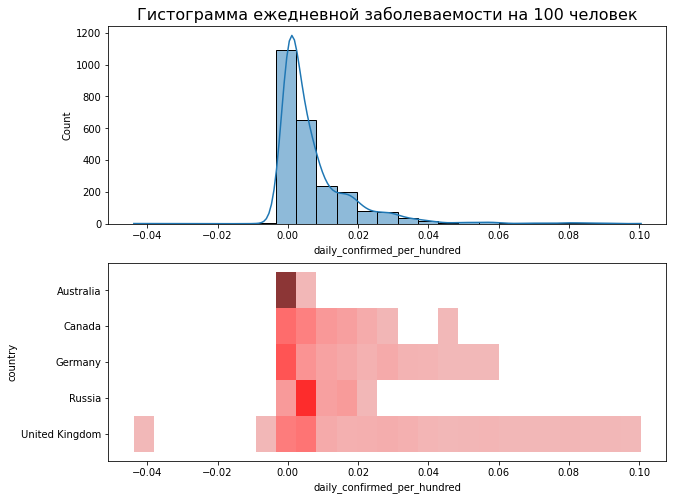

In [66]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);


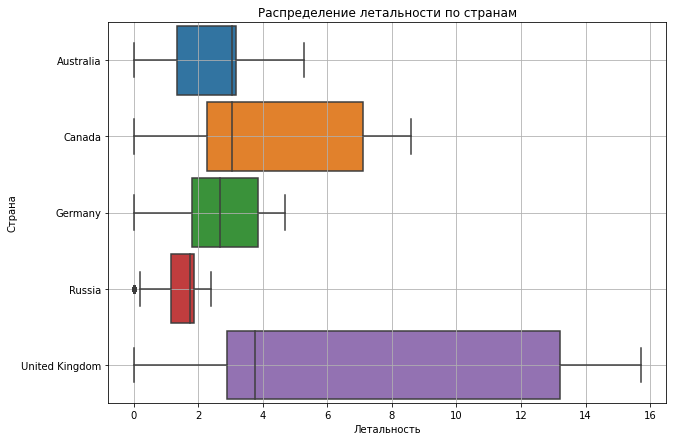

In [67]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

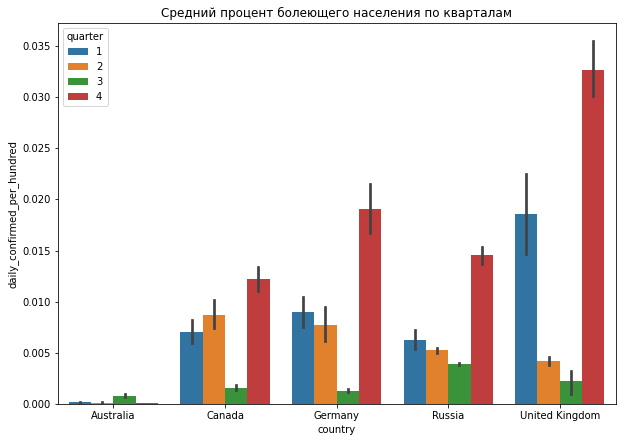

In [68]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам');


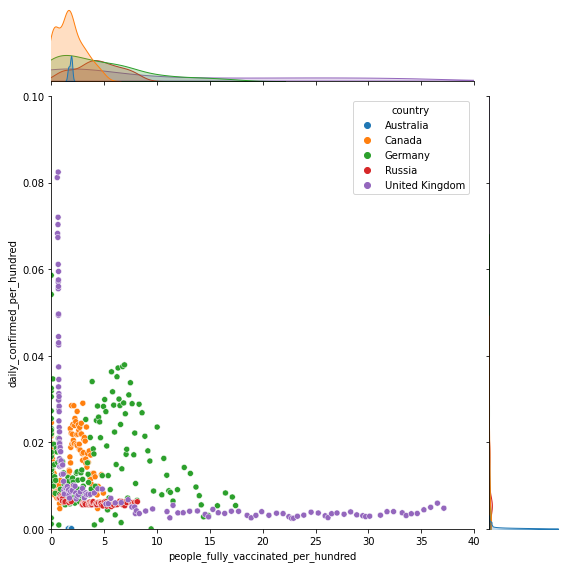

In [69]:
jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,
)


In [70]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)


date            2020-12-13  2020-12-14  2020-12-15  2020-12-16  2020-12-17  \
country                                                                      
Australia              NaN         NaN         NaN         NaN         NaN   
Canada                 NaN         0.0        0.00        0.01        0.02   
Germany                NaN         NaN         NaN         NaN         NaN   
Russia                 NaN         NaN        0.02         NaN         NaN   
United Kingdom        0.13         NaN         NaN         NaN         NaN   

date            2020-12-18  2020-12-19  2020-12-20  2020-12-21  2020-12-22  \
country                                                                      
Australia              NaN         NaN         NaN         NaN         NaN   
Canada                0.03        0.03        0.03        0.05        0.07   
Germany                NaN         NaN         NaN         NaN         NaN   
Russia                 NaN         NaN         NaN         NaN        0.04   
United Kingdom         NaN         NaN        0.99         NaN         NaN   

date            ...  2021-05-20  2021-05-21  2021-05-22  2021-05-23  \
country         ...                                                   
Australia       ...         NaN         NaN         NaN         NaN   
Canada          ...       48.10       49.25       50.14       50.89   
Germany         ...       39.18       39.68       39.95       40.11   
Russia          ...       10.20       10.30       10.50       10.53   
United Kingdom  ...       55.01       55.33       55.63       55.82   

date            2021-05-24  2021-05-25  2021-05-26  2021-05-27  2021-05-28  \
country                                                                      
Australia            12.40       12.69       12.88       13.28       13.73   
Canada               51.77       52.39       53.05       53.95       54.99   
Germany              40.29       40.64       41.29       41.87       42.40   
Russia               10.70       10.81       11.07       11.12       11.19   
United Kingdom       55.99       56.27       56.61       56.99       57.29   

date            2021-05-29  
country                     
Australia            14.18  
Canada               55.71  
Germany              42.61  
Russia               11.29  
United Kingdom       57.56  

[5 rows x 168 columns]

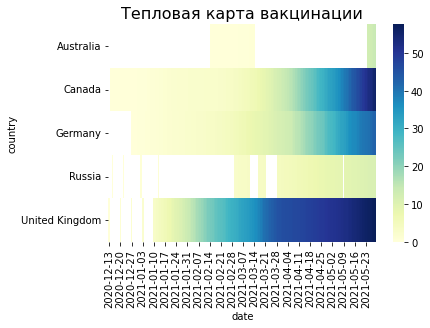

In [71]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);


Text(0.5, 1.0, 'Тепловая карта заболеваемости')

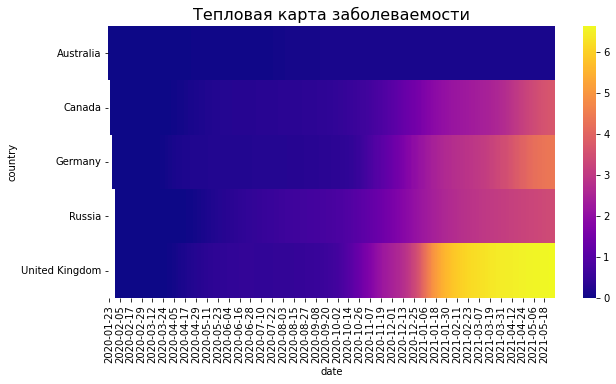

In [72]:
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed'] / croped_covid_df['population'] * 100
pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country'
)
pivot.columns = pivot.columns.astype('string')
fig = plt.figure(figsize=(10, 5))

heatmap = sns.heatmap(data=pivot, cmap='plasma')
heatmap.set_title('Тепловая карта заболеваемости', fontsize=16)


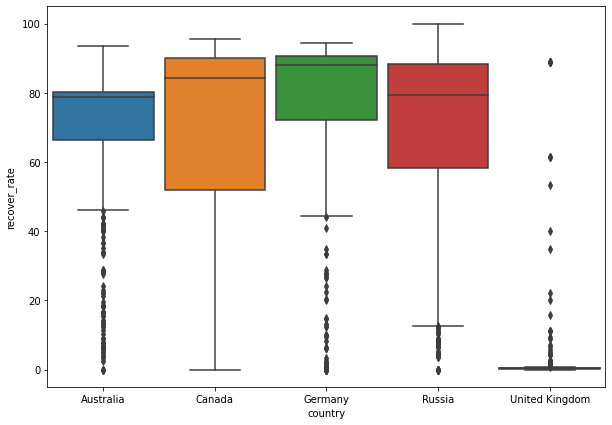

In [73]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data = croped_covid_df,
    x='country',
    y='recover_rate',
    orient='v',
    width=0.9
)


In [74]:
import plotly
import plotly.express as px
print(plotly.__version__)

# https://stackoverflow.com/a/68718345/18120860
import plotly.io as pio
pio.renderers.default = "notebook_connected"

line_data = covid_df.groupby('date', as_index=False).sum()
fig = px.line(
    data_frame=line_data,
    x='date',
    y=['confirmed', 'recovered', 'deaths', 'active'],
    height=500,
    width=1000,
    title='Confirmed, Recovered, Deaths, Active cases over Time'
)
fig.show()


5.5.0


In [75]:
#считаем средний процент выздоровлений для каждой страны
bar_data = covid_df.groupby(
    by='country',
    as_index=False
)[['recover_rate']].mean().round(2).nlargest(10, columns=['recover_rate'])

#строим график
fig = px.bar(
    data_frame=bar_data, 
    x="country", 
    y="recover_rate", 
    color='country', #расцветка в зависимости от страны
    text = 'recover_rate', 
    orientation='v', #ориентация графика
    height=500, 
    width=1000, 
    title='Top 10 Countries for Recovery Rate' 
)
fig.show()

In [76]:
#считаем среднее ежедневно фиксируемое количество выздоровевших по странам
treemap_data = covid_df.groupby(
    by='country',
    as_index=False
)[['daily_recovered']].mean()

fig = px.treemap(
    data_frame=treemap_data, 
    path=['country'], #категориальный признак, для которого строится график
    values='daily_recovered', #параметр, который сравнивается
    height=500, 
    width=1000, 
    title='Daily Recovered Cases by Country' 
)
fig.show()


In [77]:
#преобразуем даты в строковый формат
choropleth_data = covid_df.sort_values(by='date')
choropleth_data['date'] = choropleth_data['date'].astype('string')

fig = px.choropleth(
    data_frame=choropleth_data, 
    locations="country", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="confirmed", #от чего зависит цвет
    animation_frame="date", #анимационный бегунок
    range_color=[0, 30e6], #диапазон цвета
    title='Global Spread of COVID-19', 
    width=800, 
    height=500, 
    color_continuous_scale='Reds' #палитра цветов
)
fig.show()


In [78]:
#фильтруем таблицу по странам
countries=['United States', 'Russia', 'United Kingdom', 'Brazil', 'France']
scatter_data = covid_df[covid_df['country'].isin(countries)]

#строим график
fig = px.scatter_3d(
    data_frame=scatter_data, 
    x = 'daily_confirmed', 
    y = 'daily_deaths', 
    z = 'daily_vaccinations', #ось аппликат
    color='country', #расцветка в зависимости от страны
    log_x=True, 
    log_y=True,
    width=1000,
    height=700
)

fig.show()
fig.write_html("plotly/scatter_3d.html")


In [79]:
line_data = covid_df.groupby('date', as_index=False)['daily_vaccinations'].sum()
fig = px.line(data_frame=line_data, x='date', y='daily_vaccinations')
fig.show()

In [80]:
choropleth_data = covid_df.sort_values(by='date')
choropleth_data['date'] = choropleth_data['date'].astype('string')
fig = px.choropleth(
    data_frame=choropleth_data,
    locations='country',
    locationmode='country names',
    color='total_vaccinations',
    hover_name='country',
    animation_frame='date',
    color_continuous_scale='Reds',
    range_color=[0, 600e6]    
)
fig.show()